In [1]:
from matplotlib import pyplot as plt
import numpy as np

surps = {"NPS": [5.2, 3.6, 9.0, 1.5, 4.5, 8.0],
         "NPZ": [1.6, 6.7, 3.4, 2.7, 1.3, 7.7],
         "MVRR": [4.9, 6.6, 5.1, 4.1, 4.45, 7.8]}
stds = {"NPS": [1.6, 2.1, 1.5, 0.7, 1.6, 1.6],
        "NPZ": [0.9, 1.7, 1.4, 1.8, 0.6, 1.4],
        "MVRR": [1.7, 2.3, 0.9, 1.4, 1.5, 1.1]}

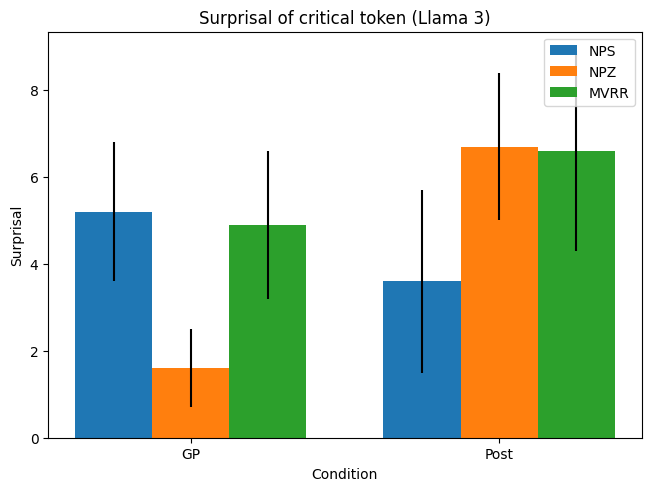

In [2]:
x = np.arange(2)
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')
for condition, values in surps.items():
    offset = width * multiplier
    these_stds = np.array(stds[condition])
    values = np.array(values)
    ax.bar(x + offset, values[:2], width, label=condition, yerr=these_stds[:2])
    multiplier += 1

ax.set_ylabel("Surprisal")
ax.set_xlabel("Condition")
ax.set_xticks(x + width, ["GP", "Post"])
plt.title("Surprisal of critical token (Llama 3)")
plt.legend()

plt.show()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


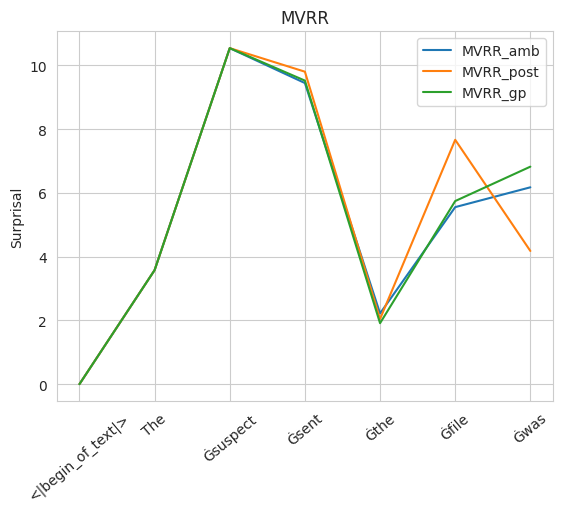

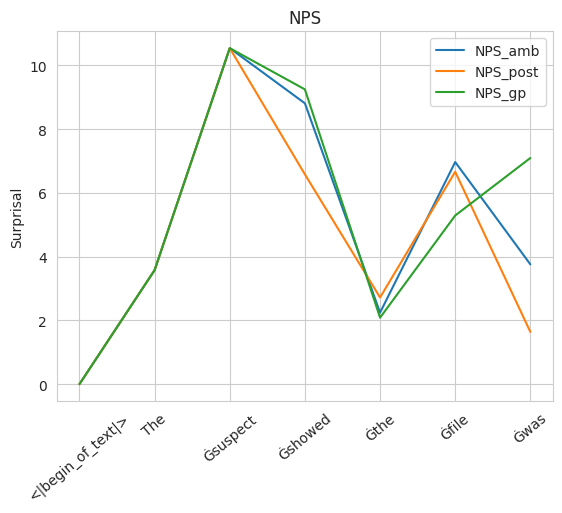

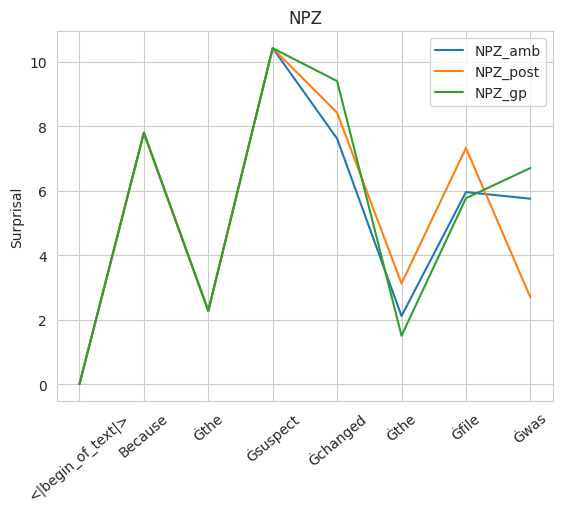

In [10]:
import json
import csv
from matplotlib import pyplot as plt
import seaborn as sns

from transformers import AutoTokenizer
import numpy as np

sns.set_style("whitegrid")

# parse examples
condition_examples = {"NPS": None, "NPZ": None, "MVRR": None}
with open("../data_csv/gp_same_len.csv", 'r') as input_data:
    model_name = "meta-llama/Meta-Llama-3-8B"
    tok = AutoTokenizer.from_pretrained(model_name)
    reader = csv.reader(input_data)
    next(reader)    # skip header
    for row in reader:
        item, condition, sentence_amb, sentence_gp, sentence_post = row
        target_len = 6 if condition in ("MVRR", "NPS") else 7

        sentence_amb_tok = tok(sentence_amb, return_tensors="pt").input_ids.to("cuda")
        sentence_gp_tok = tok(sentence_gp, return_tensors="pt").input_ids.to("cuda")
        sentence_post_tok = tok(sentence_post, return_tensors="pt").input_ids.to("cuda")
        if condition_examples[condition] is None and sentence_amb_tok.shape[-1] == target_len:
            condition_examples[condition] = tok.convert_ids_to_tokens(sentence_amb_tok[0])
            condition_examples[condition].append("Ġwas")
        if None not in condition_examples.values():
            break

with open("word_surprisals_aggnone.jsonl", 'r') as json_data:
    for condition in ("MVRR", "NPS", "NPZ"):
        for line in json_data:
            data = json.loads(line)
            this_condition = data["condition"]
            type = data["type"]
            surps = [0.0]
            surps.extend(data["sent_post_mean_surprisals"])
            if this_condition != condition:
                continue
            target_len = 6 if condition in ("NPS", "MVRR") else 7
            x = np.arange(target_len+1)

            plt.plot(x, surps, label=f"{condition}_{type}")

        plt.xticks(x, condition_examples[condition], rotation=40)
        plt.ylabel("Surprisal")
        plt.legend()
        plt.title(condition)
        plt.show()
        plt.clf(); plt.cla(); plt.close()
        json_data.seek(0)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


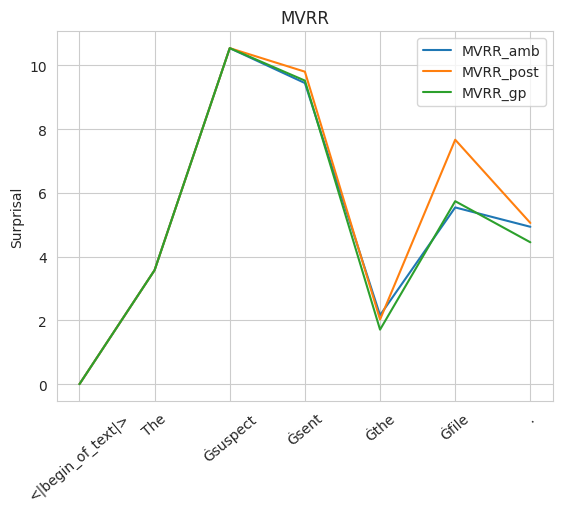

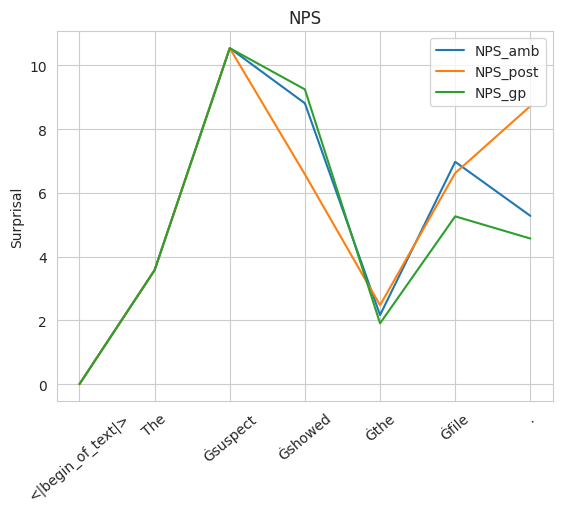

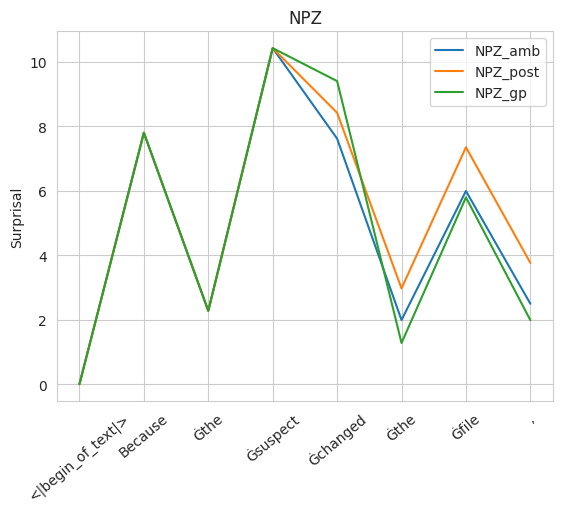

In [9]:
import json
import csv
from matplotlib import pyplot as plt
import seaborn as sns

from transformers import AutoTokenizer
import numpy as np

sns.set_style("whitegrid")

# parse examples
condition_examples = {"NPS": None, "NPZ": None, "MVRR": None}
with open("../data_csv/gp_same_len.csv", 'r') as input_data:
    model_name = "meta-llama/Meta-Llama-3-8B"
    tok = AutoTokenizer.from_pretrained(model_name)
    reader = csv.reader(input_data)
    next(reader)    # skip header
    for row in reader:
        item, condition, sentence_amb, sentence_gp, sentence_post = row
        target_len = 6 if condition in ("MVRR", "NPS") else 7

        sentence_amb_tok = tok(sentence_amb, return_tensors="pt").input_ids.to("cuda")
        sentence_gp_tok = tok(sentence_gp, return_tensors="pt").input_ids.to("cuda")
        sentence_post_tok = tok(sentence_post, return_tensors="pt").input_ids.to("cuda")
        if condition_examples[condition] is None and sentence_amb_tok.shape[-1] == target_len:
            condition_examples[condition] = tok.convert_ids_to_tokens(sentence_amb_tok[0])
            condition_examples[condition].append("," if condition == 'NPZ' else ".")
        if None not in condition_examples.values():
            break

with open("word_surprisals_aggnone.jsonl", 'r') as json_data:
    for condition in ("MVRR", "NPS", "NPZ"):
        for line in json_data:
            data = json.loads(line)
            this_condition = data["condition"]
            type = data["type"]
            surps = [0.0]
            surps.extend(data["sent_post_mean_surprisals"])
            if this_condition != condition:
                continue
            target_len = 6 if condition in ("NPS", "MVRR") else 7
            x = np.arange(target_len+1)

            plt.plot(x, surps, label=f"{condition}_{type}")

        plt.xticks(x, condition_examples[condition], rotation=40)
        plt.ylabel("Surprisal")
        plt.legend()
        plt.title(condition)
        plt.show()
        plt.clf(); plt.cla(); plt.close()
        json_data.seek(0)